In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

seed=42

from fastai.vision.all import *
from gdeep.gradcam import *

import PIL
import torchvision

from pathlib import Path
from zipfile import ZipFile

# import the requests library
import requests

np.random.seed(seed)

# Final model

In [2]:
# url to the dataset
URL = 'https://storage.googleapis.com/l2f-open-models/datasets/white-blood-cells.zip'

# download the file contents in binary format
r = requests.get(URL)
print(r)

# open the file on the system and write the contents
f = open("dataset.zip", "wb")
f.write(r.content)

# unzip file
with ZipFile("dataset.zip", 'r') as archive:
    archive.extractall('.')
    
# main folder where the dataset is located
folder = Path('./white-blood-cells/')

<Response [200]>


In [3]:

# data augmentation
tfms = aug_transforms(pad_mode='zeros', mult=2, min_scale=0.5)

# get data from folder
data = ImageDataLoaders.from_folder(path=folder, batch_tfms=tfms, bs=64)

# build the learner, with pretrained weights
learn = cnn_learner(data, models.resnet50, metrics=accuracy, pretrained=True)
print("lr finder...")
# lr_finder
#learn.lr_find()

print("training starts...")
# train
#learn.fit_one_cycle(7,1e-2)

print("unfreezing...")
# finetune
#learn.unfreeze
#learn.fit_one_cycle(7,1e-2)


lr finder...
training starts...
unfreezing...


# From single Image object

/Users/matteocaorsi/Desktop/giotto-deep/gdeep/gradcam/gradcam.py:66: UserWarning: Detected a pooling layer in the model body. Unless this is intentional, ensure that the feature map is not flattened
  warnings.warn(f"Detected a pooling layer in the model body. Unless this is intentional, ensure that the feature map is not flattened")
/Users/matteocaorsi/Desktop/giotto-deep/gdeep/gradcam/utility.py:92: UserWarning: Loaded default PIL ImageFont. It's highly recommended you use a custom font as the default font's size cannot be tweaked
  warnings.warn("Loaded default PIL ImageFont. It's highly recommended you use a custom font as the default font's size cannot be tweaked")


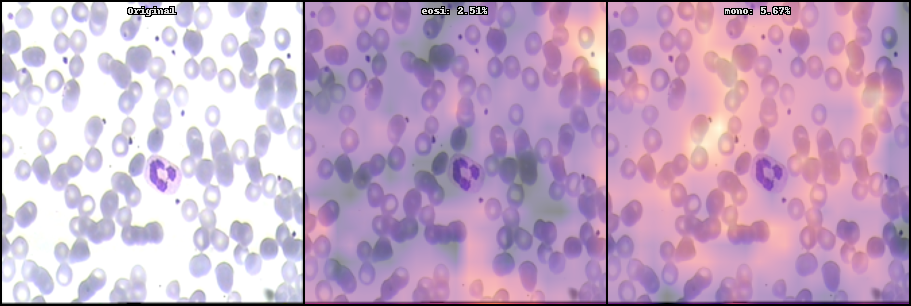

In [4]:


fname = folder/'valid/neut/8.bmp'

learn.gradcam(fname, labels=['eosi', 'mono'], img_size=(224,224), alpha=0.45, show_original=True)